In [1]:
import pandas as pd
df = pd.read_csv("../titanic.csv")

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Today in the challenge we will learn how to handle missing values in our dataset

In [19]:
#Let's see how many None values we have in each column in our dataset
#So from this we can see that in our Age column we have 177 missing values 687 in Cabin and 2 in Embarked
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

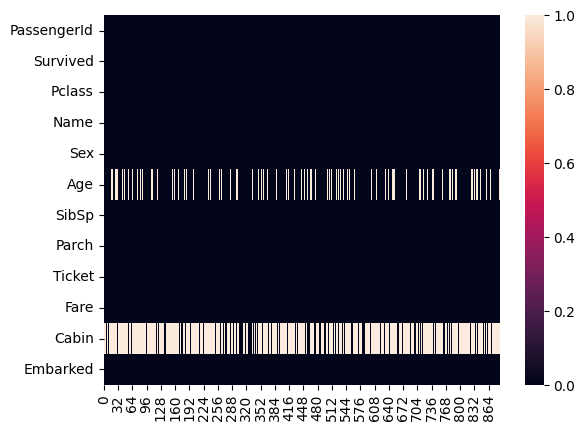

In [18]:
#Let's make a heatmap in order to see the None values in our dataset
#Using the heatmap we can see visually the missing values in the dataset
import seaborn as sns
sns.heatmap(df.isna().transpose())

In [26]:
#okay now let's work with the missing values as we already know we have missing values in Age, Cabin and Embarked columns
#So let's start from the Age column. There are many ways to work with missing values for example drop all missing values or fullfill the dataframe with median or mean values or just forward or backward fill
#In this case I guess the best method will be to drop all rwos with missing Age values as if we fullfill dataset with another values it will cause misinformation in dataset 
df = df.dropna(axis=0, subset=["Age"])
#here we dropped the rows where Age is not defined values

In [27]:
#Our next target is Cabin I guess it will be correct if we will drop the whole Cabin column totally as more than half values are missing in this column
df = df.drop(columns=["Cabin"])

In [32]:
#Now only we left embarked column with Na values 
#As we see only 2 rows has Na values in dataset and Embraked means the port where a passenger boarded the ship so I think here we can just fill the Na values with the mode from Embraked column
#As mode means the most frequent elements from features most probably that 2 people are also from that port which is mostly represented in dataset
# Let's implement the code of it
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 

In [34]:
#Let's check another time wheter we have missing values in our dataset or not
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we can see that there is not any missing values in our dataset and we can perform further actions on it